# CSC 603 - Homework 2

### Name: Reem Mohammed AlNasser
### Id: 431010436

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

# Part 1: Logestic regression

#### <font color='purple'> 1)  Write a function to compute sigmoid using the following equation: </font>

![Screen%20Shot%202021-03-18%20at%208.49.22%20AM.png](attachment:Screen%20Shot%202021-03-18%20at%208.49.22%20AM.png)

In [4]:
def sigmoid(z):
    
    ## write your code here
    return 1/(1 + np.exp(-z))

In [5]:
z=np.array([0,2., -1, 22, 100])
print(sigmoid(z))

[0.5        0.88079708 0.26894142 1.         1.        ]


#### <font color='purple'> 2)  Write a function to compute the loss using the following formula </font>

![Screen%20Shot%202021-03-18%20at%208.53.29%20AM.png](attachment:Screen%20Shot%202021-03-18%20at%208.53.29%20AM.png)

In [6]:
## y correct outputs
## y_bar: predicted outputs

def loss_f(y, y_bar):
  # write your code here
    j = len(y)
    lo = -1/ j * np.sum((y.T*np.log(y_bar)+(1-y.T)*np.log(1-y_bar)))

    return lo

y_bar=np.array([0.5,0.88079708, 0.26894142,.1 , .3])
y=np. array([1,1,0,1,0])
print(loss_f(y,y_bar)) 

0.7585193823768299


#### <font color='purple'> 3)  Write a function to compute the gradient using the following equation: </font>

In [7]:
y_bar=np.array([0.5, 0.88079708 ,0.26894142, .1, .3])
y=np.array([1,1,0,1,0])
print(loss_f(y, y_bar))

0.7585193823768299


![Screen%20Shot%202021-03-18%20at%209.34.57%20AM.png](attachment:Screen%20Shot%202021-03-18%20at%209.34.57%20AM.png)

In [8]:
def compute_grad(X, y, y_bar):

    # write your code here
    
  return 1/len(y)*np.dot(X.T,(y_bar-y))
            

In [9]:
X=np.array([[1,0.77132064, 0.02075195, 0.63364823],
 [1, 1.74880388 ,0.49850701 ,0.22479665],
 [1, 0.19806286, 0.76053071 ,0.16911084],
 [1, 0.08833981 , 3.68535982 , -0.95339335],
 [1, -0.00394827 ,0.51219226 ,0.81262096]])


In [10]:
print(X.shape)

(5, 4)


In [11]:
y_bar=np.array([0.5, 0.88079708 ,0.26894142, .1, .3])
y=np.array([1,1,0,1,0])
g=compute_grad(X, y, y_bar)

print(g)

[-0.1900523  -0.12430917 -0.60568548  0.16074014]


#### <font color='purple'> 4)  Write a function to compute $z$ using the following equation: </font>

$ z=X *\theta $

In [12]:
def f(X, theta):
  
    ## write your code here
    z = X.dot(theta)
    
    x = np.matrix(X)
    return z

In [13]:
theta=np.array([-1, .0, -2., .022])
z=f(X, theta)
print(z)

[-1.02756364 -1.99206849 -2.51734098 -8.39169429 -2.00650686]


#### <font color='purple'> 5)  Write a function to predict class labels for samples in X. </font>

In [14]:

    ### write your code here
            ## note if output>=0.5 then output 1 else: 0
def predict(X,theta):
        y=X.dot(theta)
        s= sigmoid(y)

        y_pre= [1 if p >= 0.5 else 0 for p in s]

        print(s)
        return y_pre
p=(predict(X,theta))
print(p)

[2.63556716e-01 1.20038198e-01 7.46514188e-02 2.26691383e-04
 1.18521435e-01]
[0, 0, 0, 0, 0]


In [15]:
print(predict(X,theta))



[2.63556716e-01 1.20038198e-01 7.46514188e-02 2.26691383e-04
 1.18521435e-01]
[0, 0, 0, 0, 0]


#### <font color='purple'> 6)  Write a function to compute the accuracy </font>

In [16]:
def score(y_true, y_pred):
    count= 0
    # iterate over each label and check
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            count+= 1
    # compute the accuracy
    accuracy = count/len(y_true)
    return accuracy

In [17]:
y = [1,1,1,0]
y_bar=[1,1,1,1]
print(score(y,y_bar))


0.75


## Let’s also define the train function which will be used to find the model parameters that minimizes the cost function using functions above.

In [18]:
def train(X,y, lr=0.02, iter=100):
    loss=[]
    theta=np.zeros(X.shape[1])
    for i in range(iter):
        z=f(X,theta)
        
        a=sigmoid(z)
        loss_=loss_f(y,a)
        g=compute_grad(X,y, a)
        theta=theta-lr *g
        loss.append(loss_)
    print(theta)
    ##print(loss)
    
    rr=list(range(iter))
    plt.plot(rr, loss)
    plt.show()
    
        
    

[-0.18732413 -0.16456771  0.22747216 -0.22780898]


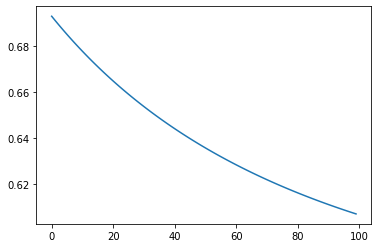

In [19]:
X=np.array([[1,0.77132064, 0.02075195, 0.63364823],
 [1, 1.74880388 ,0.49850701 ,0.22479665],
 [1, 0.19806286, 0.76053071 ,0.16911084],
 [1, 0.08833981 , 3.68535982 , -0.95339335],
 [1, -0.00394827 ,0.51219226 ,0.81262096]])


y=np.array([1,0,0,1,0])
train(X,y)

#### <font color='purple'> 6)  - Load cancer dataset from sklearn. Split the data into 70% for traing and 30% for testing. Train the training set using train function. Then, cacluate the accuracy on testing set</font>

In [20]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import matplotlib.pyplot as plt
np.seterr(invalid="ignore")

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [21]:
breast_cancer= datasets.load_breast_cancer()
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
X,y=datasets.load_breast_cancer(return_X_y=True)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3) 

# Part 2: Naive Bayes classifier

### You have a set of customers reviews (training set) and a classification as shown in the table below. 

In [70]:
reviews=[['he likes the restaurant'],['he dislikes the restaurant'],['wonderful restaurant'],
         ['great service and fantastic food']]
labels=['positive','negitive','positive','positive' ]

#### <font color='purple'> 1)  Write a function to return the number of all unique words in the training set</font>

In [81]:
def get_length_of_unique_words(corpus):
    ## write your code here

    unique_W = set()
    for text in corpus:
        for word in text[0].split():
           unique_W.add(word)

    return len(list(unique_W))    

In [82]:
V= get_length_of_unique_words(reviews)
print(V)

11


#### <font color='purple'> 2)  Write a function to return the number of all words in given class</font>

In [50]:
def get_length_of_all_words_for_given_class(corpus,All_labels,label):
    ### write your code here
    number = list()
    for i, nlabel in enumerate(labels):
        if nlabel== label:
           number.append(i)

    class_word= list()
    for i in number:  
        text= corpus[i] 
        for word in text [0].split():
            class_word.append(word)

    return len(class_word) 

In [51]:
## Test your code to validate the results
all_words_len_for_negitive_class=get_length_of_all_words_for_given_class(reviews,labels, label='negitive')
print(all_words_len_for_negitive_class)


all_words_len_for_positive_class=get_length_of_all_words_for_given_class(reviews,labels, label='positive')
print(all_words_len_for_positive_class)


4
11


#### <font color='purple'> 3)  Write a function to return the occurance of given word in spcific class</font>

In [83]:
def get_of_occurance_of_word_in_given_class(word,corpus,labels, given_class):
    ## write your code here
    count= list()
    for i,olabel in enumerate(labels):
      if olabel== given_class:
        count.append(i)

    class_w= list()
    for i in count:
        text= corpus[i]
        for word in text[0].split():
          class_w.append(word)

    occurance = 0
    for olabel in class_w:
      if olabel ==word:
        occurance +=1

    return occurance        

In [87]:
occurance=get_of_occurance_of_word_in_given_class('restaurant', reviews, labels, 'negitive')
occurance

1

#### <font color='purple'> 4)  Write a function to calculate the  prior probablity for given class</font>

In [100]:
def get_prior_prob(c):
    # write your code here
    all_words_len_for_class = get_length_of_all_words_for_given_class(reviews, labels,label=c)


    all_words_len_for_negitive_class = get_length_of_all_words_for_given_class(reviews, labels, label="negitive")
    all_words_len_for_positive_class = get_length_of_all_words_for_given_class(reviews, labels, label="positive")

    prior= all_words_len_for_class/(all_words_len_for_negitive_class + all_words_len_for_positive_class)

    return prior


In [101]:

print(get_prior_prob('negitive'))

0.26666666666666666


#### <font color='purple'> 4)  Write a function to caclulate the likelihood for a word given a class p(word|class)</font>

In [107]:
## p(word|class)

def get_likelihood_for_given_word(corpus,all_labels,word,given_class):
    V=get_length_of_unique_words(reviews)
    Len_of_all_words_for_given_class=get_length_of_all_words_for_given_class(corpus,all_labels, given_class)
    occurance_=get_of_occurance_of_word_in_given_class('restaurant', reviews, labels, 'positive')
    
    ## apply the formula
    likeihood=(occurance_+1)/(Len_of_all_words_for_given_class+V)
    return likeihood
  

In [ ]:
likeihood=get_likelihood_for_given_word(reviews, labels, 'restaurant', 'negitive')
print(likeihood)


0.13333333


# Part 3: Classification using PCA, KNN, and logesitic regression

### LFW dataset
###### The LFW dataset contains 13,233 images of faces collected from the web. This dataset consists of the 5749 identities with 1680 people with two or more images.

In [113]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [114]:
## load lfw dataset
lfw= fetch_lfw_people(min_faces_per_person=10)

In [115]:
print(lfw.DESCR[:500])

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two


In [116]:
X=lfw.data
y=lfw.target
X.shape

(4324, 2914)

In [117]:
(X - np.mean(X))/np.std(X)

array([[-0.73073566, -1.0470717 , -0.7379252 , ..., -2.0320268 ,
        -1.9457533 , -1.9241849 ],
       [-1.5431437 , -0.9320404 ,  0.08886187, ..., -2.736593  ,
        -2.700646  , -2.6646986 ],
       [-0.41439974, -0.5438099 , -0.4287786 , ...,  0.19670366,
         0.3189245 ,  0.69277596],
       ...,
       [-2.420257  , -1.9817007 , -1.5215755 , ..., -1.1621028 ,
        -1.1764818 , -1.2196186 ],
       [-0.9823666 , -0.9823666 , -0.99674547, ...,  1.5123736 ,
         1.3182584 ,  1.3326374 ],
       [-1.6006595 , -1.5359545 , -1.1189661 , ..., -2.3267941 ,
        -2.3555522 , -2.4490151 ]], dtype=float32)

In [118]:
len(lfw.target_names)

158

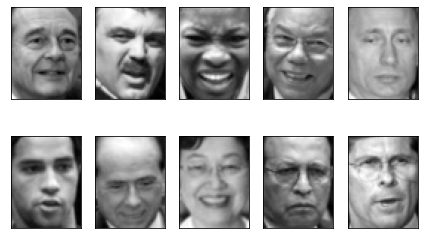

In [112]:
def plot_faces(images, n_row=2, n_col=5):
    w=47
    h=62
    """Helper function to plot a gallery of portraits"""
 
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()

#plot the average face and some samples from the dataset
plot_faces(X)


In [122]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.3,random_state=5)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### 3- Write Python code to implement a face recognition systems using scikit-learn on lfw dataset. These systems include:
1- Logestic regression model  (feed the images [raw features] into the logestic regression directly)<br> 
2- PCA + K_NN (number of principle components=100)<br>
3- PCA+ logestic regression( number of principle components=100)<br>
4- K-NN<br>
5- Create a table comparsions to compare the accuracy of the Face recogniton systems above (Note: use tabulate library to print tabular data. For more details: https://pypi.org/project/tabulate/


In [123]:
### write your code here
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [124]:
log= LogisticRegression()
R=log.fit(X_train,y_train)
y_p= log.predict(X_test)

acc=metrics.accuracy_score(y_test,y_p)
print(acc)


0.43143297380585516


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [126]:
pca_k=make_pipeline(PCA(n_components=100),KNeighborsClassifier())
pca_k.fit(X_train,y_train)
y_p2 =pca_k.predict(X_test)
ml=metrics.accuracy_score(y_test, y_p2)
print(ml)

0.21571648690292758


In [127]:
pca_lo=make_pipeline(PCA(n_components=100),LogisticRegression())
pca_lo.fit(X_train,y_train)
y_p3 =pca_lo.predict(X_test)
ml2=metrics.accuracy_score(y_test, y_p3)
print(ml2)

0.3967642526964561


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [128]:
neighbor=KNeighborsClassifier()
neighbor.fit(X_train,y_train)
y_p4=neighbor.predict(X_test)
acc1=metrics.accuracy_score(y_test, y_p4)
print(acc1)

0.2103235747303544


In [129]:
from tabulate import tabulate
table = [[" Logestic regression",acc],["PCA + K_NN ",ml],
         ["PCA+ logestic regression",ml2],["K_NN",acc1]]
print(tabulate(table))

------------------------  --------
Logestic regression       0.431433
PCA + K_NN                0.215716
PCA+ logestic regression  0.396764
K_NN                      0.210324
------------------------  --------
